### Importing libraries

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

#Translation package
from googletrans import Translator

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

### Make a request to a website and get a response

In [12]:
base_site = "https://www.letudiant.fr/etudes/annuaire-enseignement-superieur/etablissement/etablissement-estiam-82456.html"

response = requests.get(base_site)
response.status_code

200

### Getting a HTML content from a response

In [14]:
html = response.content

In [15]:
soup = BeautifulSoup(html, 'html.parser')

### Save a response to an HTML file

In [89]:
# with open('projet_pedagogique.html', 'wb') as file:
#     file.write(soup.prettify('utf-8'))

### Retrieve parent element

In [18]:
divs = soup.find_all('div', attrs={'class': 'c-box--wire__section'})
#divs

### Extract name and publication date

In [96]:
# [div.find('div', {'class': 'c-avis__user__info__resume__name'}) for div in divs]

In [97]:
# full_name_date = [None if div.find('div', {'class': 'c-avis__user__info__resume__name'}) is None else div.find('div', {'class': 'c-avis__user__info__resume__name'}).string.strip().replace("\n", "").replace("", "") for div in divs]
# full_name_date

### Extract Comments

In [20]:
#[div.find('p', {'class': 'c-avis__user__comment'}) for div in divs]

In [22]:
comments = [None if div.find('p', {'class': 'c-avis__user__comment'}) is None else div.find('p', {'class': 'c-avis__user__comment'}).string.strip() for div in divs]
#comments

In [101]:
# TextBlob("The movie is dirty").sentiment

### Create a Dataframe 

In [107]:
comments_info = pd.DataFrame()

comments_info['Comments'] = comments

#comments_info

In [108]:
pd.set_option('display.max_colwidth', None)
#comments_info

### Cleaning Data 

In [109]:
comments_info = comments_info.dropna()
# comments_info

In [110]:
comments_info = comments_info.replace(r'^\s*$', np.NaN, regex=True)#
# comments_info

In [111]:
comments_info.dropna(subset = ["Comments"], inplace=True)
# comments_info

In [121]:

comments_info['Comments'] = comments_info.Comments.str.replace(r'\n', '')
# comments_info['Comments'] = comments_info.Comments.str.replace(r'.', '')

comments_info = comments_info.replace(r'^\s*$', np.NaN, regex=True)
comments_info.dropna(subset = ["Comments"], inplace=True)

# comments_info

### Translate comments from french to English

In [113]:
translator = Translator()         
df = pd.DataFrame(comments_info)
df['Comments_English'] = df['Comments'].apply(translator.translate,src='fr',dest='en').apply(getattr, args=('text',))
# df

In [111]:
# TextBlob("the movie was bad").sentiment

### Define and create a polarity sentiment for each comments

#### 1 for postive, 0 for neutral, -1 for negative

In [114]:
pol = []
for i in comments_info.Comments_English.values:
    try:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

In [115]:
comments_info['pol'] = pol

In [116]:
comments_info['pol'][comments_info.pol==0] = 0
comments_info['pol'][comments_info.pol > 0]= 1
comments_info['pol'][comments_info.pol < 0]= -1

In [117]:
df_positive = comments_info[comments_info.pol==1]
# df_positive.head(5)

In [118]:
df_positive = comments_info[comments_info.pol==-1]
# df_positive

In [119]:
df_positive = comments_info[comments_info.pol==0]
# df_positive.head(5)

### Display bar chart to evaluate the polarity

 1.0    18
 0.0     3
-1.0     1
Name: pol, dtype: int64

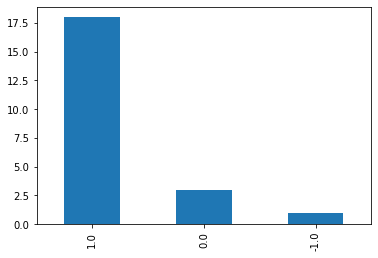

In [120]:
comments_info.pol.value_counts().plot.bar()
comments_info.pol.value_counts()

### Other Code not relevant at all

In [52]:
# comments_info.shape

In [53]:
# comments_info.info()
# comment_infos.describe().transpose()

In [45]:
# comments_info.describe().transpose()

In [44]:
# count = comment_infos.isnull().sum().sort_values(ascending=False)
# percentage = ((comment_infos.isnull().sum()/len(comment_infos)*100)).sort_values(ascending=False)
# missing_data = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])

# print('Count and Percentage of mising values for the columns:')

# missing_data

In [189]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# print('Percentage for default\n')
# print(round(comment_infos.Comments.value_counts(normalize=True)*100,2))
# round(comment_infos.Comments.value_counts(normalize=True)*100,2).plot(kind='bar')
# plt.title('Precentage per comment')
# plt.show()

In [ ]:
# import re
# import string

# def text_clean_1(text):
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)